## Lab 2: Clustering ##

The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A custom description of the features can be found at this link: (https://drive.google.com/file/d/0BycRP8EC1WVVUmo5d3kwTWlDYlk/view). 

If, at any place, you wish to include a comment or a discussion of your code/results, please add a Text cell below your answer/code. A text cell can be added by clicking on '+TEXT' in the upper left corner.


Link: https://colab.research.google.com/drive/1Iwp5U54BipebX8EZZLTVnGZ3HE6ot6pB

# Environment Setup
Run this cell to setup your environment.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviews.csv')
df = pd.read_csv('yelp_reviewers.csv')
print(df.shape)
df.dropna().describe()

print('....SETUP COMPLETE....')

--2019-02-13 16:19:13--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350863 (12M) [application/zip]
Saving to: ‘yelp_reviewers.zip’

yelp_reviewers.zip  100%[===================>]  11.78M   884KB/s    in 15s     

2019-02-13 16:19:28 (781 KB/s) - ‘yelp_reviewers.zip’ saved [12350863/12350863]

Archive:  yelp_reviewers.zip
  inflating: yelp_reviewers.csv      
Dataset Downloaded: yelp_reviews.csv
(171639, 43)
....SETUP COMPLETE....


***

### Question 1 ###

Choose an implementation of k-means. Which one have you used? (Scikit-learn, custom, other)



### ANSWER: Scikit-learn

***

### Question 2 ###
What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes). Only consider 2 <= k <= 8.  

NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


###  NOTE: I WILL BE USING ONLY 30% SAMPLED DATA POINTS FOR CLUSTERING ANALYSIS.

In [0]:
import random
random.seed(10)

In [0]:
# YOUR CODE HERE
q46 = df.copy()
q46 = q46.sample(frac=0.3) #sampling 30% of data
q46 = q46.iloc[:,2:5] #selecting only q4-q6

In [5]:
#setting range of k to be tested
range_n_clusters = range(2,9) #setting range of n_clusters

#graphing function taken from scikit-learn documentation for visualizing clusters and using sillouete score. 
for n_clusters in range_n_clusters:  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(q46)
    silhouette_avg = silhouette_score(q46, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(q46, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9868667524011625
For n_clusters = 3 The average silhouette_score is : 0.9806885498736055
For n_clusters = 4 The average silhouette_score is : 0.9599499528976233
For n_clusters = 5 The average silhouette_score is : 0.907813718768624
For n_clusters = 6 The average silhouette_score is : 0.86208051400909
For n_clusters = 7 The average silhouette_score is : 0.7904418075910156
For n_clusters = 8 The average silhouette_score is : 0.7382784872165131


### ANSWER: Based purely in the silhouette score we can choose n_clusters or k =  2.

***

### Question 3 ###
Answer question 2 but using the log of the features (q7-q10)



### ASUMMING THAT "LOG" MEANS NATURAL LOG. IN ORDER TO PREVENT "-inf" or N/A VALUES, WE WILL DROP ALL ROWS THAT CONTAIN "0" VALUES. OTHER STRATEGY COULD BE CHANGING 0 TO 1. We will employ the former.

In [29]:
# YOUR CODE HERE
q710 = df.copy()
q710 = q710.dropna(axis=0)
q710 = q710.iloc[:,5:9]
q710 = q710[(q710 != 0).all(1)]
q710 = q710.sample(frac=0.3)

#taking the log of columns q7 to q10
q710['q7'] = np.log(q710['q7'])
q710['q8'] = np.log(q710['q8'])
q710['q9'] = np.log(q710['q9'])
q710['q10'] = np.log(q710['q10'])

#for loop to evaluate a range of clustering and printing average silhouette_score
range_n_clusters3 = range(2,9)

for n_clusters in range_n_clusters3:
    clusterer3 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels3 = clusterer3.fit_predict(q710)
    silhouette_avg3 = silhouette_score(q710, cluster_labels3)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg3)

For n_clusters = 2 The average silhouette_score is : 0.37204354522740074
For n_clusters = 3 The average silhouette_score is : 0.27320032551595286
For n_clusters = 4 The average silhouette_score is : 0.2530558723116086
For n_clusters = 5 The average silhouette_score is : 0.26341151283943987
For n_clusters = 6 The average silhouette_score is : 0.2666222233118672
For n_clusters = 7 The average silhouette_score is : 0.2553543554397969
For n_clusters = 8 The average silhouette_score is : 0.25343395089329007


### ANSWER: Based purely in the silhouette score we can choose n_clusters or k =  2.

***

### Question 4 ###
Answer question 2 but using the percentage of the features (q11-q13)



Assuming "percentage of the features" is just the name of features q11-q13 and not a task. NOTE: we are dropping rows with N/A values.

In [7]:
# YOUR CODE HERE
q1113 = df.copy()
q1113 = q1113.dropna(axis=0) #dropping na rows
q1113 = q1113.sample(frac=0.3) #sampling 30% of data
q1113 = q1113.iloc[:,9:12] #indexing q11 to q13


#clustering for loop
range_n_clusters4 = range(2,9)

for n_clusters in range_n_clusters4:
    clusterer4 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels4 = clusterer4.fit_predict(q1113)
    silhouette_avg4 = silhouette_score(q1113, cluster_labels4)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg4)

For n_clusters = 2 The average silhouette_score is : 0.42452923140715515
For n_clusters = 3 The average silhouette_score is : 0.37327191034010865
For n_clusters = 4 The average silhouette_score is : 0.3842980804829566
For n_clusters = 5 The average silhouette_score is : 0.4002335328889002
For n_clusters = 6 The average silhouette_score is : 0.42737169580945367
For n_clusters = 7 The average silhouette_score is : 0.4135013970135121
For n_clusters = 8 The average silhouette_score is : 0.4254594202771847


### ANSWER: Based purely in the silhouette score we choose n_clusters or k = 8. An argument can be made for n_clusters = 2 based on the turning point and that as n_clusters go to infinity the clustering will eventually be perfect but we will stick with k = 8

***

### Question 5 ###
Inspect the [best] clustering generated from question 4

#### 5.a ####
**Question**: List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)

Since 8 clusters is the best n_clusters then we will analyze this setup.

In [8]:
# YOUR CODE HERE
from collections import Counter, defaultdict

#running clustering on selected k
clusterer5 = KMeans(n_clusters=8, random_state=10)
cluster_labels5 = clusterer5.fit_predict(q1113)
silhouette_avg5 = silhouette_score(q1113, cluster_labels5)

#maping data points to their respective clusters 
cluster_map = pd.DataFrame()
cluster_map['data_index'] = q1113.index.values
cluster_map['cluster'] = cluster_labels5

#counting data points per cluster
print(Counter(cluster_labels5))

Counter({1: 1474, 0: 1290, 5: 1130, 3: 832, 6: 756, 7: 754, 2: 585, 4: 441})


### ANSWER: Cluster 1: 1474, Cluster 0: 1290, Cluster 5: 1130, Cluster 3: 832, Cluster 6: 756, Cluster 7: 754, Cluster 2: 585, Cluster 4: 441

#### 5.b ####
**Question**: Were there clusters that represented very funny but useless reviewers?  If so, print them.

**Answer**: We will employ an absolute ratio by dividing number of funny votes divided by funny votes + useful votes. The higher the ratio the more funny votes present therefore the more funny and consequently the least useful.

$$ Ratio = \frac{\sum(funny \space votes)}{\sum(funny \space votes) + \sum(useful \space votes)} $$

The higher the ratio, the more funny but useless.

In [0]:
#indexing original dataframe to extract datapoints inside clusters
#NOTICE THAT CLUSTER COUNTING START FROM 0, NAMING IS CLUSTER(#QUESTION NUMBER)_(CLUSTER #)

cluster5_0 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 0]['data_index'])]
cluster5_1 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 1]['data_index'])]
cluster5_2 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 2]['data_index'])]
cluster5_3 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 3]['data_index'])]
cluster5_4 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 4]['data_index'])]
cluster5_5 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 5]['data_index'])]
cluster5_6 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 6]['data_index'])]
cluster5_7 = q1113[q1113.index.isin(cluster_map[cluster_map.cluster == 7]['data_index'])]

In [10]:
#LIST OF DATAFRAMES TO ITERATE FROM
allclusters = [cluster5_0, cluster5_1, cluster5_2, cluster5_3, cluster5_4, cluster5_5, cluster5_6, cluster5_7]
name = ['cluster5_0', 'cluster5_1', "cluster5_2", "cluster5_3", "cluster5_4", "cluster5_5", "cluster5_6", "cluster5_7"]

k = 0

#Ratio "FOR" LOOP: 
for clusters in allclusters:
    funnynorm = clusters['q12'].sum() / ((clusters['q13']).sum() + clusters['q12'].sum())
    print(name[k], ": ", funnynorm)
    k = k + 1

cluster5_0 :  0.34158380889750495
cluster5_1 :  0.5005203851636687
cluster5_2 :  0.1433478738741031
cluster5_3 :  0.1977043732536765
cluster5_4 :  0.6719740515144003
cluster5_5 :  0.22172385571315892
cluster5_6 :  0.3594252509983303
cluster5_7 :  0.4297906090521649


The most funny and least useful cluster would be cluster5_4 which has the highest ratio of funny to useful and it is shown below.

In [30]:
cluster5_4.head()

,q11,q12,q13
105507,22.22,44.44,33.33
47749,25.00,50.00,25.00
49136,25.00,50.00,25.00
51318,12.50,50.00,37.50
119322,12.50,50.00,37.50


### ANSWER: Cluster5_4 is the choice in this case. NOTICE THAT THE ANSWER CHANGES EACH TIME THE CODE IS RUN (MOSTLY  BETWEEN CLUSTER5_3 AND CLUSTER 5_4). THIS IS BECAUSE OF THE RANDOM NATURE OF KMEANS!

#### 5.c ####
**Question**: How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?  

**Answer**:

We will measure this using the absolute sume of the deviation from equality of each voting category:

$$ Absolute \space Deviation = \space \mid (\sum funny \space votes) - \frac{1}{3}) \mid  + \mid (\sum cool \space votes) - \frac{1}{3}) \mid  + \mid (\sum useful \space votes) - \frac{1}{3}) \mid  $$

The farther from 0 means the more deviated from relative equal strength in all voting categories.

In [12]:
#
name = ['cluster5_0', 'cluster5_1', "cluster5_2", "cluster5_3", "cluster5_4", "cluster5_5", "cluster5_6", "cluster5_7"]
k = 0

#Deviation formula "FOR" loop
for clusters in allclusters:
    funnyper = clusters['q12'].sum() / ((clusters['q13']).sum() + clusters['q12'].sum() + clusters['q11'].sum())
    funnyabs = abs(funnyper - 1/3)
    coolper = clusters['q11'].sum() / ((clusters['q13']).sum() + clusters['q12'].sum() + clusters['q11'].sum())
    coolabs = abs(coolper - 1/3)
    usefulper = clusters['q13'].sum() / ((clusters['q13']).sum() + clusters['q12'].sum() + clusters['q11'].sum())
    usefulabs = abs(usefulper - 1/3)
    
    result = funnyabs + coolabs + usefulabs
    
    print(name[k], ": ", usefulabs)
    k = k + 1

cluster5_0 :  0.14957721759245518
cluster5_1 :  0.0027565890629255296
cluster5_2 :  0.41475916355900405
cluster5_3 :  0.20274129611380293
cluster5_4 :  0.07318822159702426
cluster5_5 :  0.2985619879484113
cluster5_6 :  0.02052526042431385
cluster5_7 :  0.14713687037846063


As you can see above from the absolute deviation from relative equal strength, cluster5_1 represents relatively equal strength in all voting categories. The dataframe is shown belowe and can be inmediatly conclude that this is correct.

In [33]:
cluster5_1.head()

,q11,q12,q13
87633,33.33,33.33,33.33
1782,36.36,29.55,34.09
112089,33.33,33.33,33.33
115400,33.33,33.33,33.33
88350,33.33,33.33,33.33


### ANSWER: cluster5_1 (cluster #1 counting from 0)

***

### Question 6 ###
Cluster the dataset using $k = 5$ and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars)

In [0]:
# YOUR CODE HERE
q715 = df.copy()
q715 = q715.dropna(axis=0)
q715 = q715.sample(frac=0.3)
q715q3 = q715.iloc[:,1:2]
q715 = q715.iloc[:,5:14]

#taking the log of q15
q715['q15'] = np.log(q715['q15'])

In [0]:
#clustering using k=5
clusterer6 = KMeans(n_clusters=5, random_state=10)
cluster_labels6 = clusterer6.fit_predict(q715)
silhouette_avg6 = silhouette_score(q715, cluster_labels6)

#### 6.a ####
**Question**: What is the silhouette metric for this clustering?   
You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [16]:
# YOUR CODE HERE
#The question gives the OPTION for using the "max" but will use average instead.
print("For n_clusters = 5",
          "the average silhouette_score is :", silhouette_avg6)

For n_clusters = 5 the average silhouette_score is : 0.37425945812427924


### ANSWER: 0.37425945812427924

#### 6.b ####
**Question**: What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)

In [17]:
# YOUR CODE HERE
#mapping cluster dataframe indexes
cluster_map6 = pd.DataFrame()
cluster_map6['data_index'] = q715.index.values
cluster_map6['cluster'] = cluster_labels6

print(Counter(cluster_labels6))

#building clusters dataframes
cluster6_0 = q715[q715.index.isin(cluster_map6[cluster_map6.cluster == 0]['data_index'])]
cluster6_1 = q715[q715.index.isin(cluster_map6[cluster_map6.cluster == 1]['data_index'])]
cluster6_2 = q715[q715.index.isin(cluster_map6[cluster_map6.cluster == 2]['data_index'])]
cluster6_3 = q715[q715.index.isin(cluster_map6[cluster_map6.cluster == 3]['data_index'])]
cluster6_4 = q715[q715.index.isin(cluster_map6[cluster_map6.cluster == 4]['data_index'])]

Counter({4: 1942, 3: 1916, 1: 1372, 2: 1221, 0: 811})


In [18]:
allclusters6 = [cluster6_0, cluster6_1, cluster6_2, cluster6_3, cluster6_4]
name6 = ['cluster6_0', 'cluster6_1', "cluster6_2", "cluster6_3", "cluster6_4"]
k = 0

#Since q7 is just the log of q3, then we will take the exponential to revert from log(x) to x in this "FOR" loop 
for clusters6 in allclusters6:
    mean = np.exp(clusters6["q7"].mean())
    print("The average number of reviews per reviewer for", name6[k], "is ", mean)
    k = k + 1

The average number of reviews per reviewer for cluster6_0 is  3.5023711035709684
The average number of reviews per reviewer for cluster6_1 is  5.723940314492471
The average number of reviews per reviewer for cluster6_2 is  6.221084870020375
The average number of reviews per reviewer for cluster6_3 is  3.2279173976468836
The average number of reviews per reviewer for cluster6_4 is  4.551295630785661


### ANSWER: See above for average number of reviews per reviewer for each cluster.

***

### Question 7 ###
Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [19]:
# YOUR CODE HERE
question7na = df.copy()
question7na = question7na.iloc[:,5:]
question7na.isnull().sum()

q7            0
q8       117853
q9       122162
q10       81153
q11       71282
q12       71282
q13       71282
q14           0
q15           0
q16a          0
q16b          0
q16c          0
q16d          0
q16e          0
q16f          0
q16g          0
q16h          0
q16i          0
q16j          0
q16k          0
q16l          0
q16m          0
q16n          0
q16o          0
q16p          0
q16q          0
q16r          0
q16s          0
q16t          0
q16u          0
q16v          0
q16w          0
q16x          0
q16y          0
q16z          0
q16aa         0
q16ab     47594
q16ac         0
dtype: int64

In [20]:
original7na = question7na.count().max()
print("The maximum number of rows in the original dataframe is {}.".format(original7na))
question7na = question7na.dropna(axis=0)
after7na = question7na.count().max()
print("The maximum number of rows in the dataframe after droping rows with N/A values is {}.".format(after7na))
print("That is, we are eliminating {} rows of mixed data!".format(original7na - after7na))

The maximum number of rows in the original dataframe is 171639.
The maximum number of rows in the dataframe after droping rows with N/A values is 24205.
That is, we are eliminating 147434 rows of mixed data!


It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columns before removing any columns.

In [21]:
question7 = df.copy()
question7 = question7.iloc[:,5:]

#drop features q8 and q9
question7 = question7.drop("q8", axis=1)
question7 = question7.drop("q9", axis=1)
question7 = question7.dropna(axis=0)
print("The number of rows left after removing N/A rows after removing the features q8 and q9 are {} rows.".format(question7.count().max()))

The number of rows left after removing N/A rows after removing the features q8 and q9 are 65546 rows.


By removing 2 features, we double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [0]:
#getting dummies for the two categorical features q16s and q16t
question7 = pd.get_dummies(question7)

Now normalize the remaining features.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

question7 = pd.DataFrame(scaler.fit_transform(question7), columns=question7.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
question7.head()

,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,...,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
0,0.186757,0.000000,0.000000,0.000000,1.000000,0.833333,0.029824,0.0,0.204124,0.000654,...,0.000000,0.031555,0.022727,0.0,0.000974,0.916667,1.0,0.0,1.0,0.0
1,0.186757,0.000000,0.000000,0.000000,1.000000,0.916667,0.099814,0.1,0.816497,0.000187,...,0.005809,0.089547,0.000000,0.0,0.000974,0.666667,1.0,0.0,1.0,0.0
2,0.186757,0.141207,0.000000,0.000000,1.000000,0.833333,0.076061,0.0,0.816497,0.000784,...,0.015063,0.059576,0.000000,0.0,0.002921,0.666667,1.0,0.0,1.0,0.0
3,0.353141,0.229782,0.267867,0.000000,0.738083,0.833333,0.081015,0.5,0.705527,0.000736,...,0.016786,0.061266,0.000000,0.0,0.002921,0.593750,1.0,0.0,0.0,1.0
4,0.117148,0.000000,0.000000,0.559973,0.476166,0.833333,0.072158,0.1,0.750000,0.000827,...,0.000000,0.082602,0.000000,0.0,0.002921,0.625000,1.0,0.0,1.0,0.0


#### 7.a ####
**Question**: Using the silhouette metric, what was the best k?  

**Answer**:  

In [0]:
#sampling only 30% of data frame
question7 = question7.sample(frac=0.3)

In [26]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
range_n_clusters7 = range(2,9)

#CLUSTERING for loop which also takes the clusters inertia (sum of squared errors)
sse = {}
for n_clusters in range_n_clusters7:
    clusterer7 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels7 = clusterer7.fit_predict(question7)
    silhouette_avg7 = silhouette_score(question7, cluster_labels7)
    
    sse[n_clusters] = clusterer7.inertia_
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg7)

For n_clusters = 2 The average silhouette_score is : 0.2162148104258146
For n_clusters = 3 The average silhouette_score is : 0.24068537929080022
For n_clusters = 4 The average silhouette_score is : 0.2104467556851194
For n_clusters = 5 The average silhouette_score is : 0.2251183977623763
For n_clusters = 6 The average silhouette_score is : 0.2039163780731082
For n_clusters = 7 The average silhouette_score is : 0.20632393672616312
For n_clusters = 8 The average silhouette_score is : 0.2146009701537268


### ANSWER: n_clusters = 2

#### 7.b ####
**Question**: Using the the sum of within cluster variance metric with the elbow method what was the best k?  
**Answer**:  

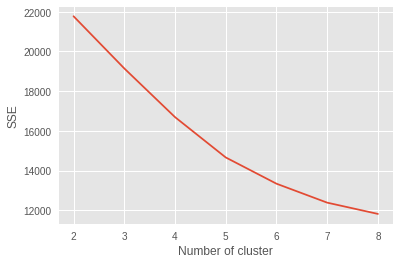

In [27]:
# YOUR CODE HERE
# THE CODE FOR EVALUATE THE SUM OF WITHIN CLUSTER VARIANCE WAS DONE IN THE PREVIOUS "FOR" LOOP
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### ANSWER: The turning point is the point where the first drastic change in slope in the SSE vs K happens. In this case the k after drastic change in slope is k = 5. 

### Question 8 ###
For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


### ANSWER:

What type of businesses receive the most useful, voting and cool reviews? Do bars receive more cool reviews although not useful? Do Transportation Businesses like the DMV or BART stations reviews receive more useful votes but not cool? How can we use these answers to categorize the quality of the review? Not having useful votes in a bar review not necessarily means their bad if other people are looking for cool places to go out.

With clustering, I can identify the type of businesses that receive more cool, useful or funny votes. This information can also help businesses improve in certain aspects.

## Bonus question (+20%) - Reviewer overlap:
Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Print head() of this newly created dataset.

In [0]:
# YOUR CODE HERE

## Bonus question #2 (+10%) - Do you like Boba?

    A. YEAH
    B. NO
    C. HELL YEAH
 
 ### **Justify your answer. Put extra effort into your justification if you choose 'B'.**
    


### ANSWER: A and B

I enjoy the tea but I really do not enjoy the tapioca balls. Also, did you know that there are a lot of naturally occuring toxins like cyanide (which are taken out in processing) in tapioca?